In [1]:
import pandas as pd

import plotnine
from plotnine import *

dpi=300

In [2]:
df=pd.read_csv('../data/Fig4E.csv', index_col=0)
df['Celltype']=[c + '_covid19' for c in df['Celltype'].values]
df

,Background,Celltype,value,cell_state_dendrogram_index,Percentage_roi_thresMean
0,PRES,EC.Arterial_covid19,-0.430425,28,0.285714
1,EDAD,EC.Arterial_covid19,1.262580,28,0.472222
2,MDAD,EC.Arterial_covid19,-1.077283,28,0.166667
3,ODAD,EC.Arterial_covid19,0.245129,28,0.461538
4,PRES,Mesothelial_covid19,0.695855,17,0.428571
...,...,...,...,...,...
123,ODAD,B.Plasma.IgG_covid19,1.268080,15,0.538462
124,PRES,EC.Venous.Sys_covid19,-0.786323,3,0.380952
125,EDAD,EC.Venous.Sys_covid19,-0.661160,3,0.305556
126,MDAD,EC.Venous.Sys_covid19,0.054055,3,0.416667


In [3]:
manual_cell_order=[
    'EC.Arterial_covid19',
    'Mesothelial_covid19',
    'FB.Basal_covid19',
    'Monocyte_covid19',
    None,
    'Macro.Alv.Meta.CCL_covid19',
    'FB.Alveolar_covid19',
    'Macro.HSP_covid19',
    None,
    'Proliferating.T.NK_covid19',
    'EC.Capillary_covid19',
    None,
    'Macro.CHIT1.like_covid19',
    'Macro.Alv_covid19',
    'T.CD4+_covid19',
    'T.CD8+_covid19',
    'B.Plasma.IgA_covid19',
    'FB.Myofibroblast_covid19',
    'FB.Adventitial_covid19',
    'B.Plasma.IgG_covid19',
    'EC.Venous.Sys_covid19'
]

order_of_pathology=['PRES', 'EDAD', 'MDAD', 'ODAD'][::-1]

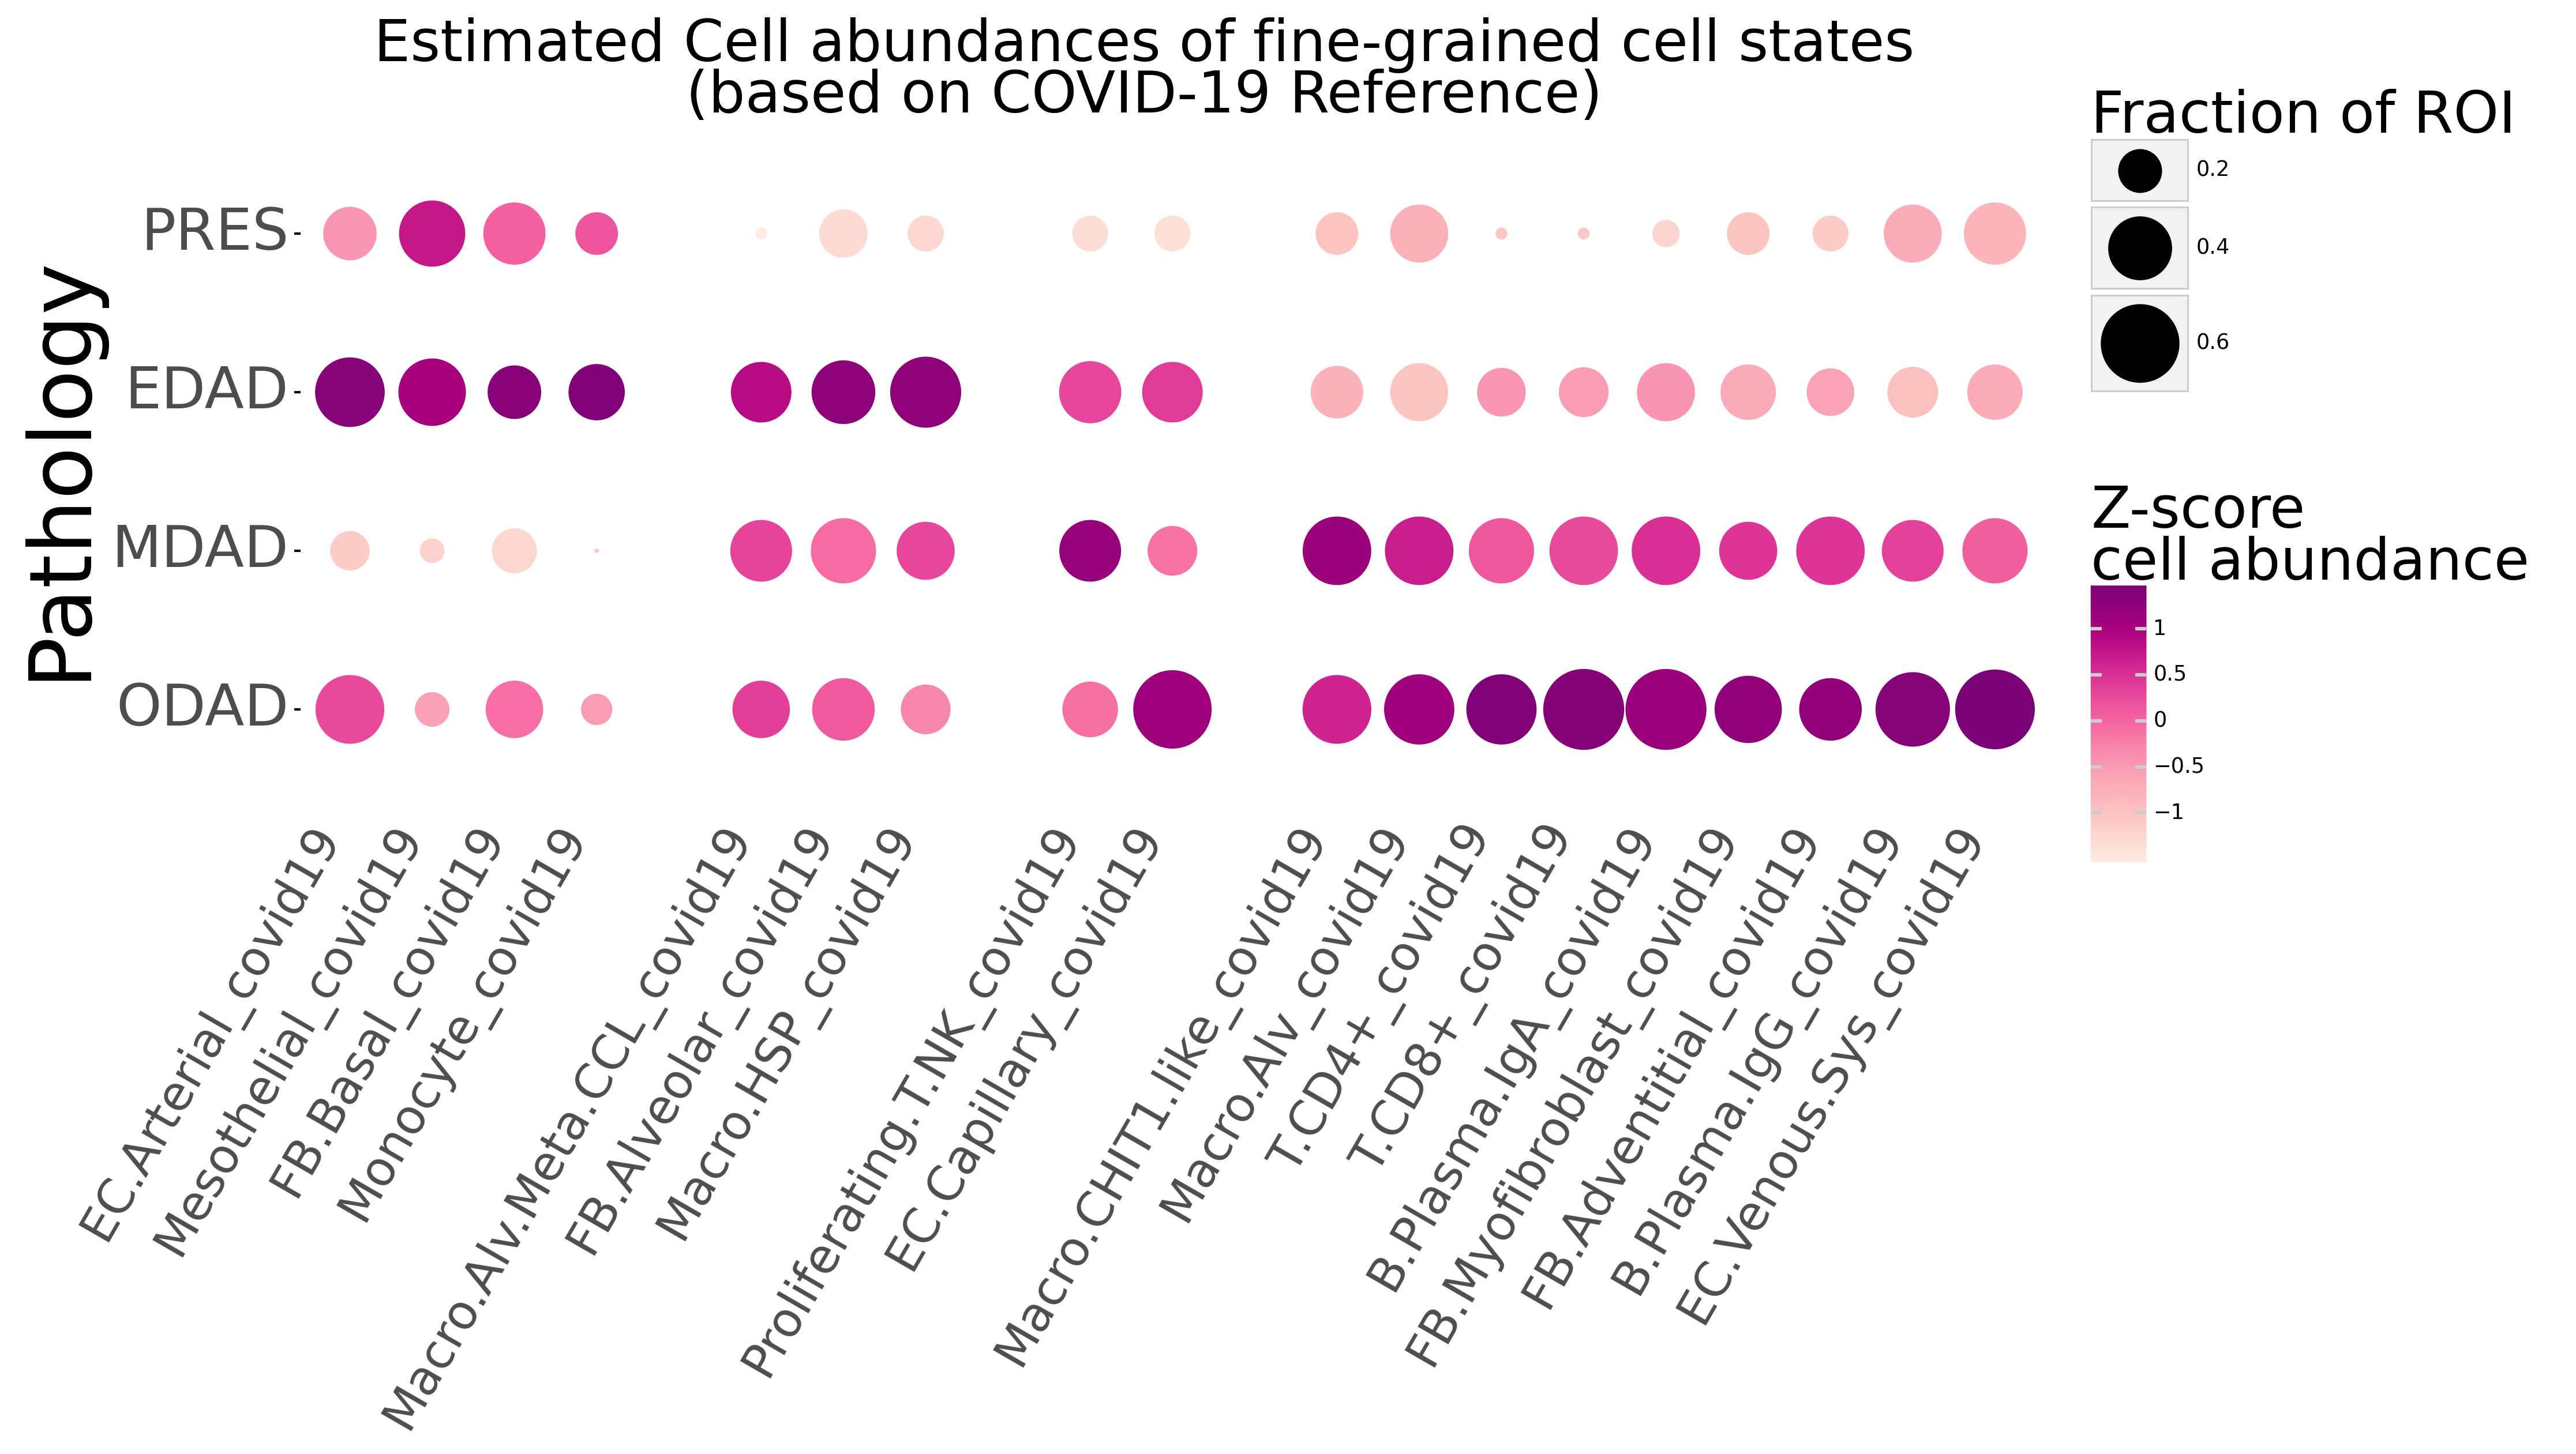

<ggplot: (8765840169469)>

In [4]:
p1=(
    ggplot()
    + geom_point(
        data=df[[c in manual_cell_order for c in df['Celltype']]], 
        mapping=aes(
            x='Celltype', 
            y='Background', 
            fill='value', 
            colour='value',
            size='Percentage_roi_thresMean'
        )
    )
    + theme_bw()
    + theme(
        axis_text_x=element_text(angle=60, vjust=1, hjust=1, size=20), 
        axis_text_y=element_text(size=24),
        axis_title=element_text(size=36), 
        axis_ticks_major_x=element_blank(),
        title=element_text(size=24),
        panel_grid_major=element_blank(),
        panel_border=element_blank(),
        panel_spacing_x=.5,
        panel_spacing_y=.2,
        figure_size=(13,5), 
        dpi=dpi,
        legend_position='right' 
    ) 
    + scale_size_continuous(range=[0,18]) 
    + scale_fill_distiller(palette='RdPu', direction=1) 
    + scale_colour_distiller(palette='RdPu', direction=1) 
    + scale_x_discrete(limits=manual_cell_order ) 
    + scale_y_discrete(limits=order_of_pathology) 
    + labs(
        x='', 
        y='Pathology', 
        title='Estimated Cell abundances of fine-grained cell states\n(based on COVID-19 Reference)',
        size='Fraction of ROI', 
        fill='Z-score\ncell abundance\n', 
        colour='Z-score\ncell abundance\n'
    )
)

# ggsave(p1, 'Fig4E.svg', format='svg')

p1